In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os

In [3]:
from glob import glob
import cv2
import tensorflow as tf

In [4]:
from PIL import Image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetV2B0, MobileNetV2
from tensorflow.keras.optimizers import Optimizer, Adam
from tensorflow.keras.utils import load_img
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading images 

In [5]:
train_path = '/kaggle/input/intel-image-classification/seg_train/seg_train/'
test_path = '/kaggle/input/intel-image-classification/seg_test/seg_test/'
pred_path = '/kaggle/input/intel-image-classification/seg_pred/seg_pred/'

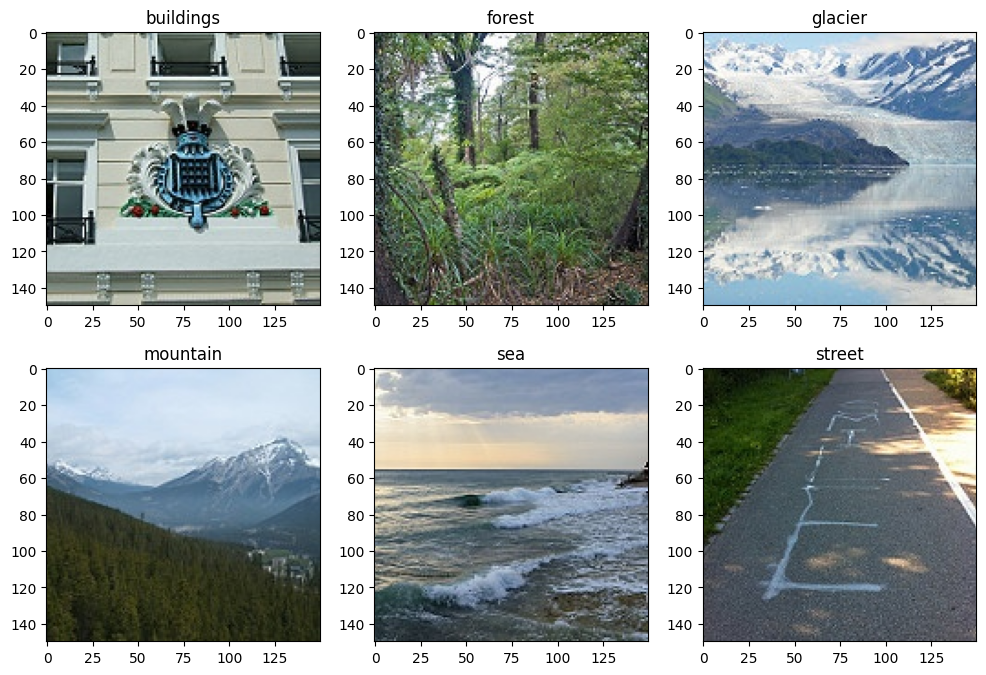

In [6]:
# display a few images 
#this code is from: https://www.kaggle.com/code/elvisyananlin/intel-image-classification-tansfer-learning-91-5

train_dict = {}
test_dict = {}
for i in os.listdir(train_path):
    train_dict[i] = os.path.join(train_path, i)
for i in os.listdir(test_path):
    test_dict[i] = os.path.join(test_path, i)
    

def show_image(ax, image):
    img_paths = glob(f"{train_path}{image}/*")
    i = np.random.randint(len(img_paths))
    img = Image.open(img_paths[i])
    ax.imshow(img)
    ax.set_title(image)

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
image_categories = list(train_dict.keys())
show_image(ax[0, 0], 'buildings')
show_image(ax[0, 1], 'forest')
show_image(ax[0, 2], 'glacier')
show_image(ax[1, 0], 'mountain')
show_image(ax[1, 1], 'sea')
show_image(ax[1, 2], 'street')



In [7]:
for folder in  os.listdir(train_path) : 
    files = glob(pathname= str( train_path + folder + '/*.jpg'))
    print(f'Found {len(files)} in folder {folder}')

Found 2512 in folder mountain
Found 2382 in folder street
Found 2191 in folder buildings
Found 2274 in folder sea
Found 2271 in folder forest
Found 2404 in folder glacier


In [8]:
for folder in  os.listdir(test_path) : 
    files = glob(pathname= str( test_path + folder + '/*.jpg'))
    print(f'Found {len(files)} in folder {folder}')

Found 525 in folder mountain
Found 501 in folder street
Found 437 in folder buildings
Found 510 in folder sea
Found 474 in folder forest
Found 553 in folder glacier


In [9]:
files = glob(pathname= str(pred_path +'*.jpg'))
print(f'Found {len(files)}')

Found 7301


In [10]:
#Checking the size of the images
size = []
for folder in os.listdir(train_path):
    files = glob(pathname= str( train_path + folder + '/*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(143, 150, 3)        2
(108, 150, 3)        2
(146, 150, 3)        2
(142, 150, 3)        2
(123, 150, 3)        2
(136, 150, 3)        2
(134, 150, 3)        2
(144, 150, 3)        2
(81, 150, 3)         1
(149, 150, 3)        1
(119, 150, 3)        1
(76, 150, 3)         1
(120, 150, 3)        1
(97, 150, 3)         1
(105, 150, 3)        1
(141, 150, 3)        1
(110, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(145, 150, 3)        1
(140, 150, 3)        1
(124, 150, 3)        1
(103, 150, 3)        1
(100, 150, 3)        1
(131, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
Name: count, dtype: int64